# Pre-Project Assignment

### Goals

- To create at least one function to automate modeling processes and getting metrics
- Understand the model object and how to retrieve information from a model
- (Optional) Scripting!

### Imports & Sandbox Data

You can definitely add imports as you go along!

For testing your function, we'll use the [Banknote Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). In this Binary Classification dataset, 0 is an **Authentic** banknote, 1 is a **Forged** banknote. The four features are Skewness, Variance, Kurtosis and Entropy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle # this is for scripting

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')
df.columns = ["Variance","Skewness", "Kurtosis", "Entropy", "Class"]

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [5]:
# feel free to inspect your data here!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1371 non-null   float64
 1   Skewness  1371 non-null   float64
 2   Kurtosis  1371 non-null   float64
 3   Entropy   1371 non-null   float64
 4   Class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
df.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Fitting and Evaluating a Model

Let's start with a Decision Tree. We're going to fit a Decision Tree with default parameters and output:
- Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- Classification Report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

For **both** the train set and the test set.




In [6]:
# instantiation
dtree = DecisionTreeClassifier()

# fitting
dtree.fit(X_train, y_train)

# predictions
y_hat_train = dtree.predict(X_train)
y_hat_test = dtree.predict(X_test)

In [7]:
print(classification_report(y_train, y_hat_train))
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1096
   macro avg       1.00      1.00      1.00      1096
weighted avg       1.00      1.00      1.00      1096

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



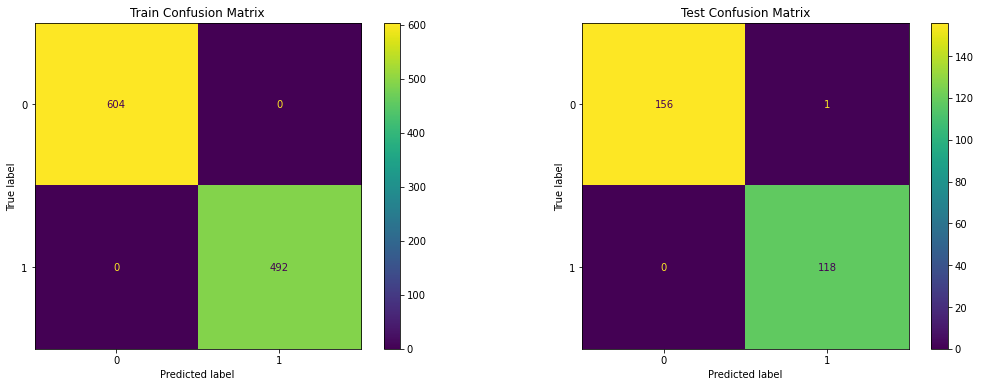

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

plot_confusion_matrix(dtree, X_train, y_train, ax=ax0)
plot_confusion_matrix(dtree, X_test, y_test, ax=ax1)

ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

## Replicate with a Random Forest

Repeat the same steps with a random forest. Start to get a sense of how your function will look.

In [9]:
rtree = RandomForestClassifier()

# fitting
rtree.fit(X_train, y_train)

# predictions
y_hat_train = rtree.predict(X_train)
y_hat_test = rtree.predict(X_test)

In [10]:
print(classification_report(y_train, y_hat_train))
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1096
   macro avg       1.00      1.00      1.00      1096
weighted avg       1.00      1.00      1.00      1096

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



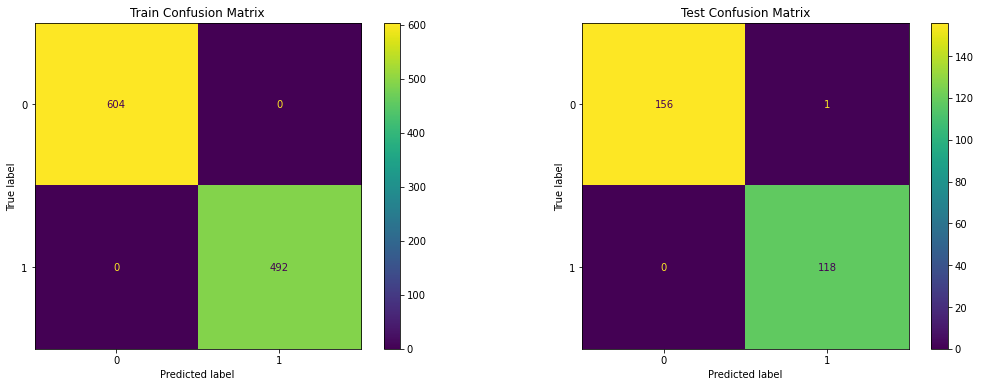

In [11]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

plot_confusion_matrix(rtree, X_train, y_train, ax=ax0)
plot_confusion_matrix(rtree, X_test, y_test, ax=ax1)

ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

## Function Time!!

Now create a function with your own inputs to be able to replicate the process with any instantiated model. You can change up the arguments of the function as you see fit, and make sure you're returning the model object if it's being fit within your function. 

You can even play around with what information your function gets for you! Perhaps the amount of time it takes for your model to train? 

In [22]:
def run_model(model, X_train, y_train, X_test, y_test):
    

# fitting
    model.fit(X_train, y_train)

# predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    print(classification_report(y_train, y_hat_train))
    print(classification_report(y_test, y_hat_test))
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

    plot_confusion_matrix(model, X_train, y_train, ax=ax0)
    plot_confusion_matrix(model, X_test, y_test, ax=ax1)

    ax0.title.set_text('Train Confusion Matrix')
    ax1.title.set_text('Test Confusion Matrix')
    
    return model # return the model object!!!

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       604
           1       0.98      0.99      0.99       492

    accuracy                           0.99      1096
   macro avg       0.99      0.99      0.99      1096
weighted avg       0.99      0.99      0.99      1096

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



LogisticRegression()

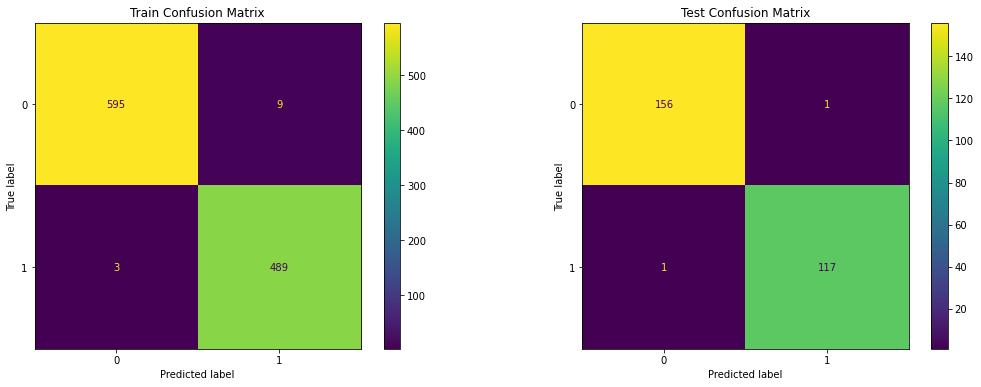

In [23]:
# import and instantiate a different sklearn model to test your function!
# after instantiating a model, the run_model function should run and output whatever you want it to output
from sklearn.linear_model import LogisticRegression

test_model = LogisticRegression()

run_model(test_model, X_train, y_train, X_test, y_test)

### Why `return` model?

In short, it allows us to access the model's attributes, such as feature importances, via a variable.

In [15]:
dtree2 = DecisionTreeClassifier(max_depth=10)
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [16]:
dtree2.feature_importances_ # for example, feature importances is an attribute of a fitted model

array([0.63755851, 0.20231375, 0.13635636, 0.02377137])

In [17]:
fi = sorted(list(zip(dtree2.feature_importances_, X_train.columns)))
fi = pd.DataFrame(fi, columns=['impt', 'name'])
fi

,impt,name
0,0.023771,Entropy
1,0.136356,Kurtosis
2,0.202314,Skewness
3,0.637559,Variance


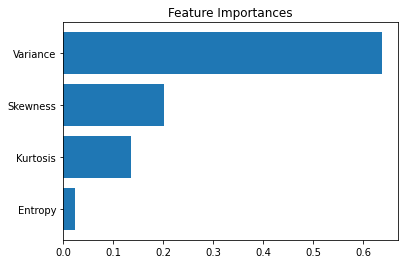

In [18]:
plt.barh(fi.name, fi.impt)
plt.title('Feature Importances');

If you were to do:

```variable = run_model(tree, X_train, y_train, X_test, y_test)```

You'd be able to access feature importances through: `variable.feature_importances_` as long as you return the model object at the end of your function. **Don't forget to return the model object!!!**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       604
           1       0.98      0.99      0.99       492

    accuracy                           0.99      1096
   macro avg       0.99      0.99      0.99      1096
weighted avg       0.99      0.99      0.99      1096

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



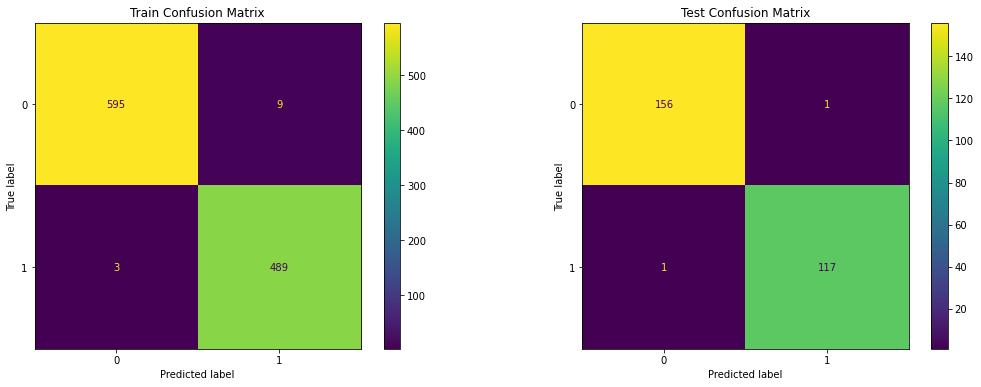

In [24]:
variable = run_model(test_model, X_train, y_train, X_test, y_test)

In [25]:
variable

LogisticRegression()

In [26]:
variable.coef_

array([[-3.2466528 , -1.68484385, -2.13384867,  0.04649566]])

## Scripting

We have talked briefly about scripting in the past! To try it out:

1. Create a Python file ending in `.py`. For example, `functions.py`
2. Copy your import statements into the Python file, as well as your function
3. To test if your script works, do: `from functions import *` and you should be able to use your function in any notebook!